In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time as time
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, rand_score, silhouette_samples, silhouette_score

## Data Processing

In [211]:
# import data and view
df = pd.read_csv("train_extended.csv", )
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


In [212]:
df = df.drop('Sex', axis=1) # dropping the categorical data
df = df.drop('id', axis=1) # dropping the redundant index column
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0
...,...,...,...,...,...,...,...,...
199995,1.8125,1.2750,0.4375,42.141532,20.000572,9.979024,11.609120,11.0
199996,0.9875,0.6750,0.2375,7.980384,3.742134,1.913591,2.267960,6.0
199997,1.1250,0.9125,0.2875,10.886208,4.904464,1.984465,3.118445,7.0
199998,1.6250,1.2750,0.4125,33.891827,13.196692,7.866986,10.489315,11.0


The data describes various measured parameters of the crabs, all of which besides Sex are numeric and therefore suitable for inclusion in the analysis. Noting that Age is the repsonse variable of interest.

In [213]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.312448,1.020320,0.346028,23.123436,9.989370,4.993181,6.634229,9.950615
std,0.289833,0.238723,0.091179,12.597823,5.604343,2.785712,3.556733,3.217088
min,0.000000,0.000000,0.000000,0.028349,0.014175,0.014175,0.042524,1.000000
25%,1.150000,0.875000,0.287500,13.154168,5.669900,2.792426,3.827183,8.000000
50%,1.375000,1.075000,0.362500,23.515910,9.851451,4.890289,6.803880,10.000000
75%,1.525000,1.200000,0.412500,32.063285,13.933779,6.959802,9.029316,11.000000
max,7.583491,2.250000,2.825000,80.101512,45.274152,26.124064,37.038622,29.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Length          200000 non-null  float64
 1   Diameter        200000 non-null  float64
 2   Height          200000 non-null  float64
 3   Weight          200000 non-null  float64
 4   Shucked Weight  200000 non-null  float64
 5   Viscera Weight  200000 non-null  float64
 6   Shell Weight    200000 non-null  float64
 7   Age             200000 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


### FIGURE 1: KDE Plots

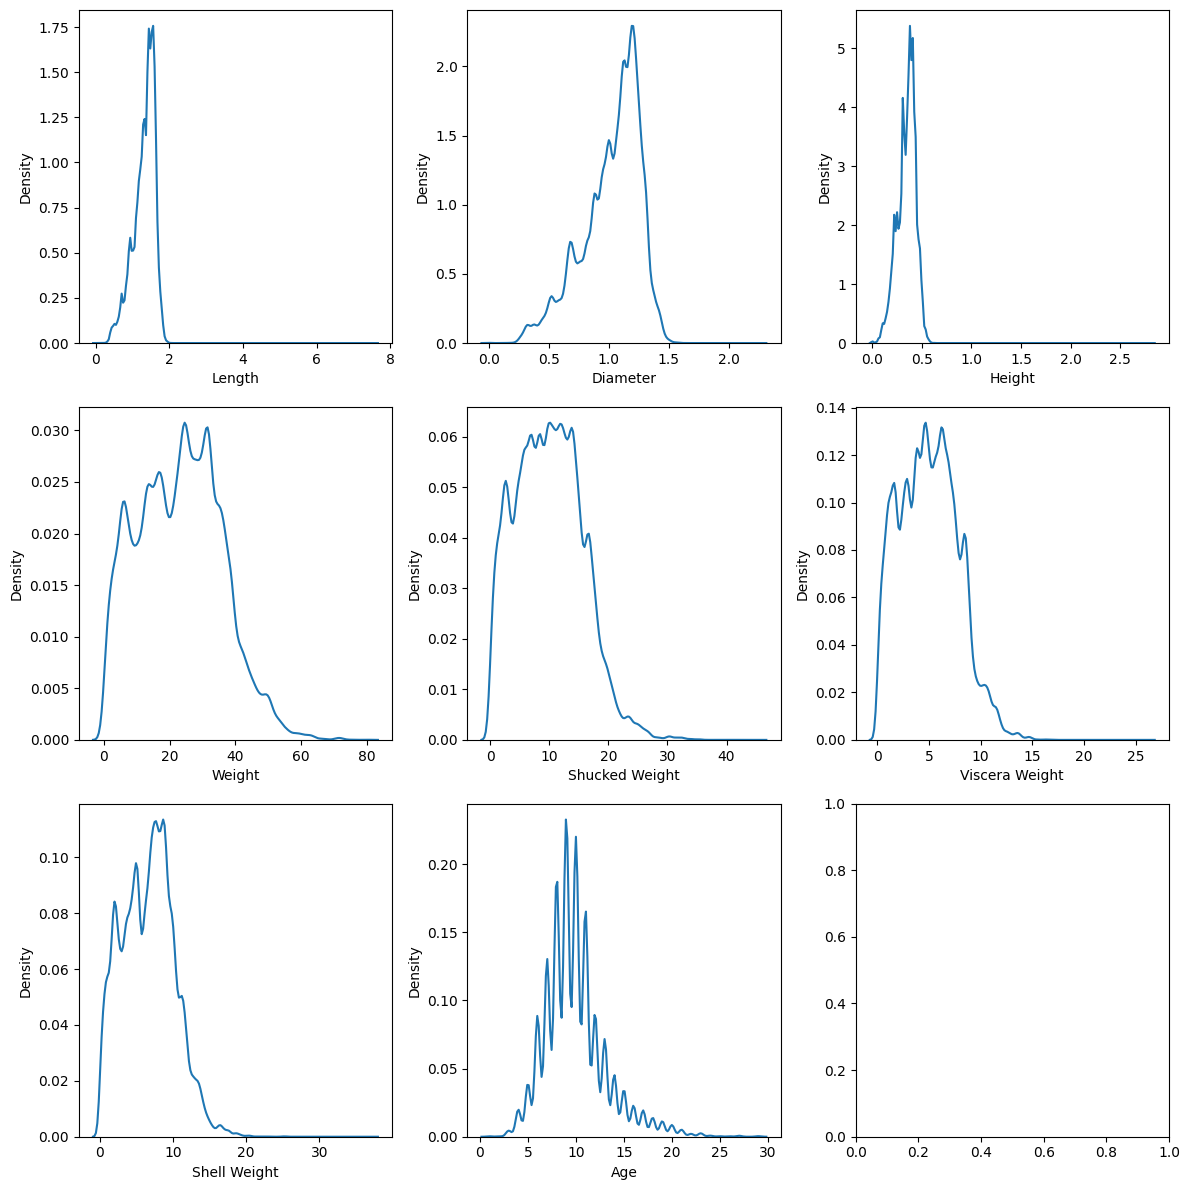

In [215]:
# KDE plots to view distributions of data
# we will check for outliers here

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axs[i])
plt.tight_layout()

No visual outliers are noted. The data description indicates that pre-processing has already occured to a fairly significant extent.

In [216]:
# create standard scaler object, used to standard-normalize data
scale = StandardScaler()

In [217]:
# scale the data and load into a dataframe
scaled_data = scale.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0.905875,0.857395,0.317752,0.643251,0.412951,0.476991,0.844766,0.015351
1,-0.258591,-0.085121,0.317752,-0.098241,-0.416643,-0.428742,0.286819,2.812919
2,0.474591,0.595585,0.729033,0.406963,0.203023,0.726322,0.175229,0.326192
3,0.129564,0.019603,0.317752,-0.121870,-0.044843,-0.316797,-0.071862,-0.295490
4,-0.603618,-0.608741,-0.641905,-0.647328,-0.720153,-0.728957,-0.821105,-0.606331


In [218]:
# our data is very, very large...
# we can train a model effectively, and much faster/more stable, with a much smaller subset
# we will sample 1/10th of the data randomly - our test set is still ~10,000 observations
df_truncated = df_scaled.sample(frac=(1/10), random_state=13)


X = df_truncated.iloc[:, :-1]
y = df_truncated[['Age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

In [219]:
# computing baseline dtree regression performance
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
dtree_labels = dtree_reg.predict(X_test) # predicting with test data
mse = mean_squared_error(y_test, dtree_labels)
print('MSE: ', mse.round(2))
    

MSE:  0.82


## Agglomerative Clustering

In [220]:
# we have generated a for loop to determine the optimal number of clusters
# this will be evaluated based on mean squared error from test set predictions, as well as silhouette score
for n_agg_clusters in range(2,10):
    agg_cluster = AgglomerativeClustering(n_clusters=n_agg_clusters, linkage="ward")
    agg_labels = agg_cluster.fit_predict(X_train) # training set labels
    test_agg_labels = agg_cluster.fit_predict(X_test) # test set labels
    
    # creating copies of the test/train sets and adding the predicted labels from clustering
    X_train_cluster = X_train.copy()
    X_train_cluster['label'] = agg_labels
    X_test_cluster = X_test.copy()
    X_test_cluster['label'] = test_agg_labels

    # using a decision tree regressor for predictions here (as the response is continuous)
    dtree_reg = DecisionTreeRegressor()
    dtree_reg.fit(X_train_cluster, y_train) # fitting regression with training data
    dtree_labels = dtree_reg.predict(X_test_cluster) # predicting with test data
    mse = mean_squared_error(y_test, dtree_labels)
    print('# clusters: ', n_agg_clusters, ' MSE: ', mse.round(2), 
          ' Sil. Score: ', silhouette_score(X_train, agg_labels).round(2))
    
    

# clusters:  2  MSE:  0.83  Sil. Score:  0.51
# clusters:  3  MSE:  0.83  Sil. Score:  0.45
# clusters:  4  MSE:  0.82  Sil. Score:  0.42
# clusters:  5  MSE:  0.88  Sil. Score:  0.34
# clusters:  6  MSE:  0.86  Sil. Score:  0.32
# clusters:  7  MSE:  0.89  Sil. Score:  0.3
# clusters:  8  MSE:  0.89  Sil. Score:  0.3
# clusters:  9  MSE:  0.89  Sil. Score:  0.28


We can see that the optimal number of clusters is 2, in regards to MSE of the predictions on the test set and the and silhouette scores of the clusters.

In [221]:
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
agg_labels = agg_cluster.fit(X_train)
agg_labels.labels_

array([0, 1, 1, ..., 0, 0, 0])

### FIGURE 2: Agglomerative Clusters

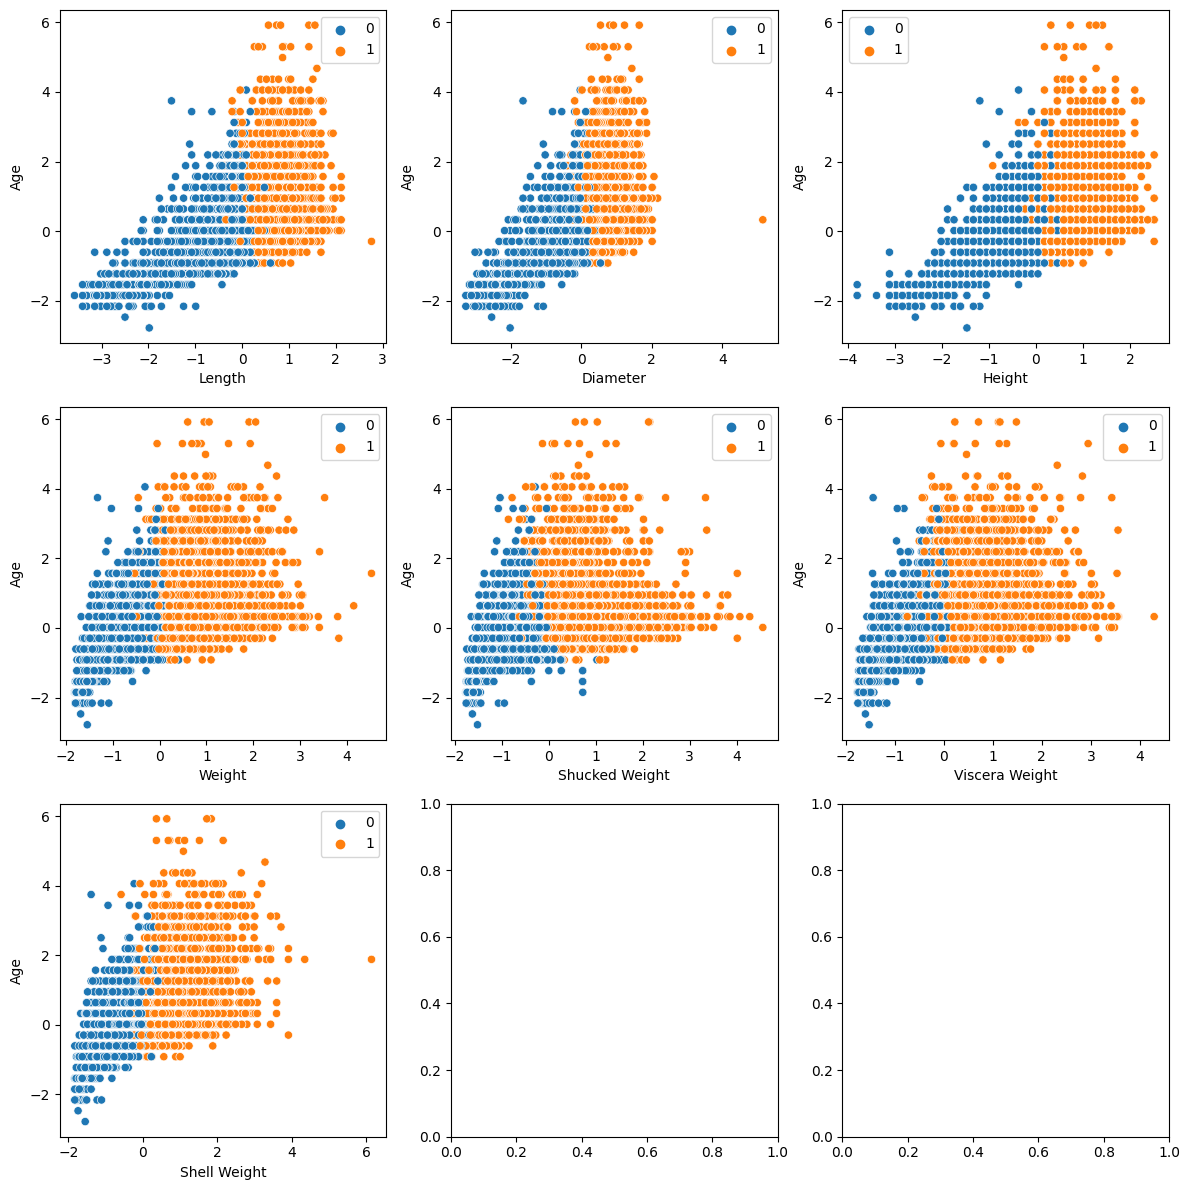

In [222]:
# itterate through columns to produce a figure showing each variables clusters in relation to the response (Age)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=y_train["Age"], 
                    hue=agg_labels.labels_, ax=axs[i])
plt.tight_layout()

### FIGURE 3: Agglomerative Clustering Silhoutte Plots  (Jeganathan, 2023)

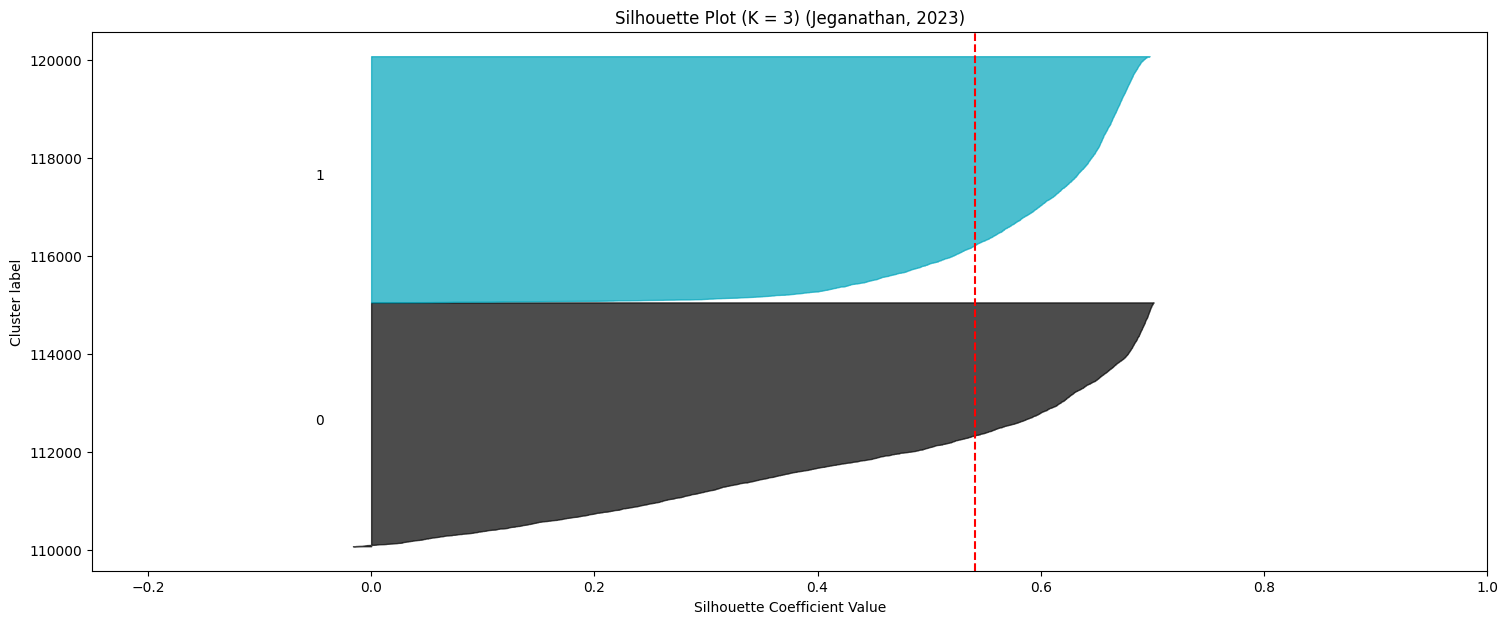

In [223]:
# Code block adapted from Jeganathan (2023)

# producing a figure to evaluate silhouette scores

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.25, 1])

for i in range(2):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_values[agg_labels.labels_ == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 2  

ax1.set_title("Silhouette Plot (K = 3) (Jeganathan, 2023)")
ax1.set_xlabel("Silhouette Coefficient Value")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_score(X_train, km_labels), color="red", linestyle="--")

## K-Means Clustering

In [224]:
# again, we have generated a for loop to determine the optimal number of clusters
# this will be evaluated based on mean squared error from test set predictions, as well as silhouette score

for n_km_clusters in range(2,10):
    km_cluster = KMeans(n_clusters=n_km_clusters, random_state=13, n_init=10).fit(X_train)
    km_cluster.fit(X_train)
    km_labels = km_cluster.fit_predict(X_train) # training set labels
    test_km_labels = km_cluster.fit_predict(X_test) # test set labels
    
    # creating copies of the test/train sets and adding the predicted labels from clustering
    X_train_cluster = X_train.copy()
    X_train_cluster['label'] = km_labels
    X_test_cluster = X_test.copy()
    X_test_cluster['label'] = test_km_labels

    # using a decision tree regressor for predictions here (as the response is continuous)
    dtree_reg.fit(X_train_cluster, y_train) # fitting regression with training data
    dtree_labels = dtree_reg.predict(X_test_cluster) # predicting with test data
    mse = mean_squared_error(y_test, dtree_labels)
    print('# clusters: ', n_km_clusters, ' MSE: ', mse.round(2), 
          ' Sil. Score: ', silhouette_score(X_train, km_labels).round(2))
    
    

# clusters:  2  MSE:  0.83  Sil. Score:  0.54
# clusters:  3  MSE:  0.82  Sil. Score:  0.46
# clusters:  4  MSE:  0.84  Sil. Score:  0.44
# clusters:  5  MSE:  0.8  Sil. Score:  0.41
# clusters:  6  MSE:  0.83  Sil. Score:  0.39
# clusters:  7  MSE:  1.06  Sil. Score:  0.36
# clusters:  8  MSE:  0.84  Sil. Score:  0.34
# clusters:  9  MSE:  0.85  Sil. Score:  0.31


We can see that the optimal number of clusters for the K-Means clustering is 2 (or maybe 3). We will use 2 once again.

In [225]:
km_cluster = KMeans(n_clusters=2, random_state=13, n_init=10).fit(X_train)
km_labels = km_cluster.fit_predict(X_train)
km_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

### FIGURE 4: K-Means Clusters

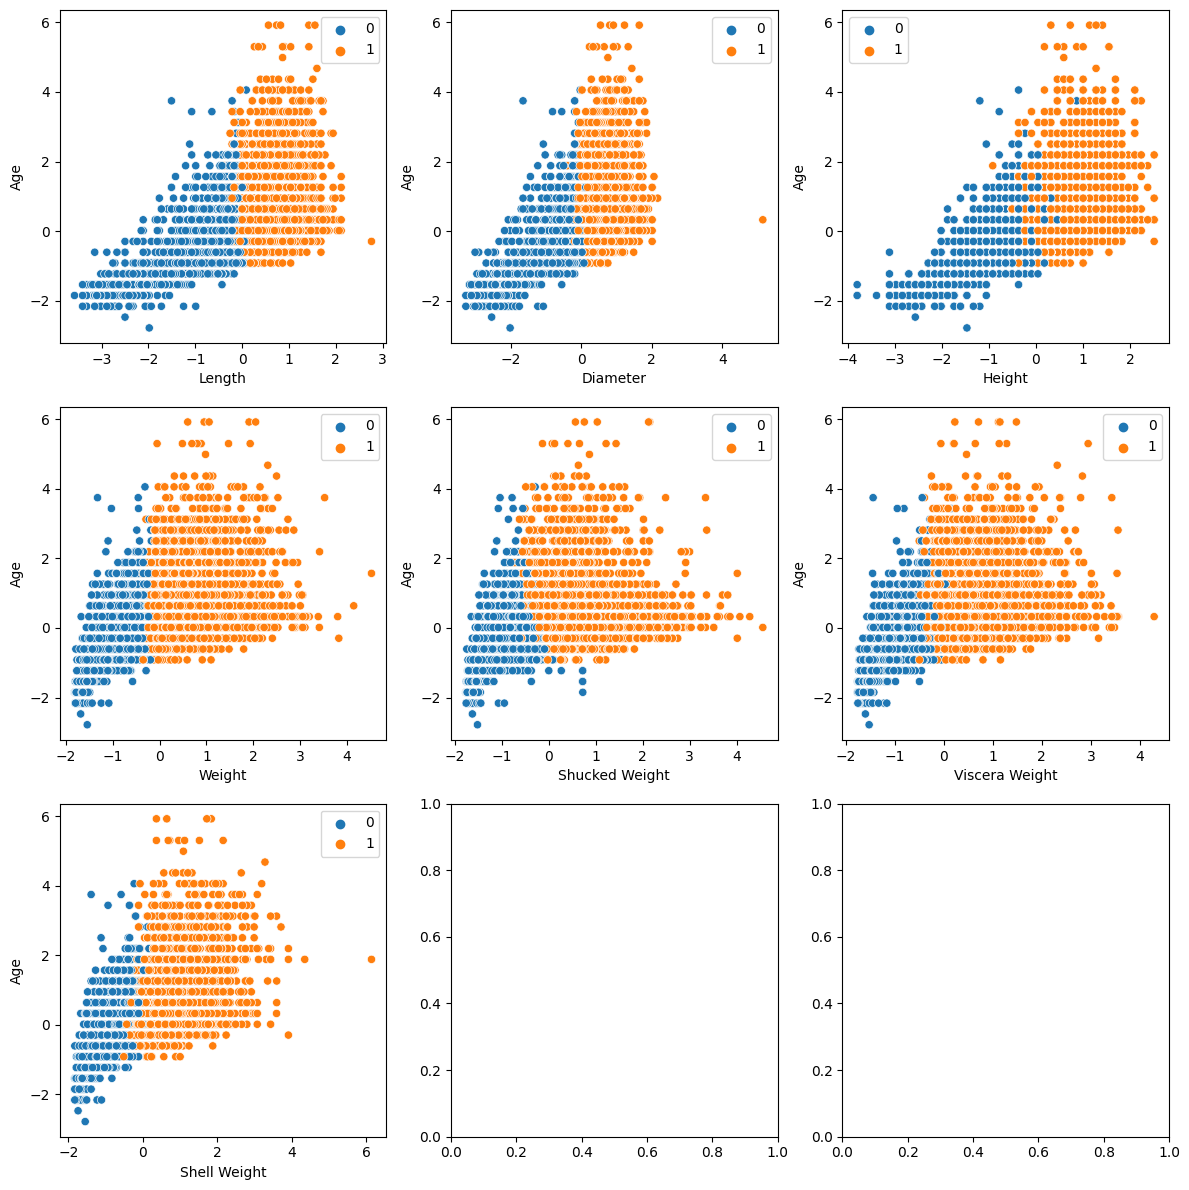

In [226]:
# itterate through columns to produce a figure showing each variables clusters in relation to the response (Age)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=y_train["Age"], 
                    hue=km_labels, ax=axs[i])
plt.tight_layout()

### FIGURE 5: K-Means Clustering Silhoutte Plots (Jeganathan, 2023)

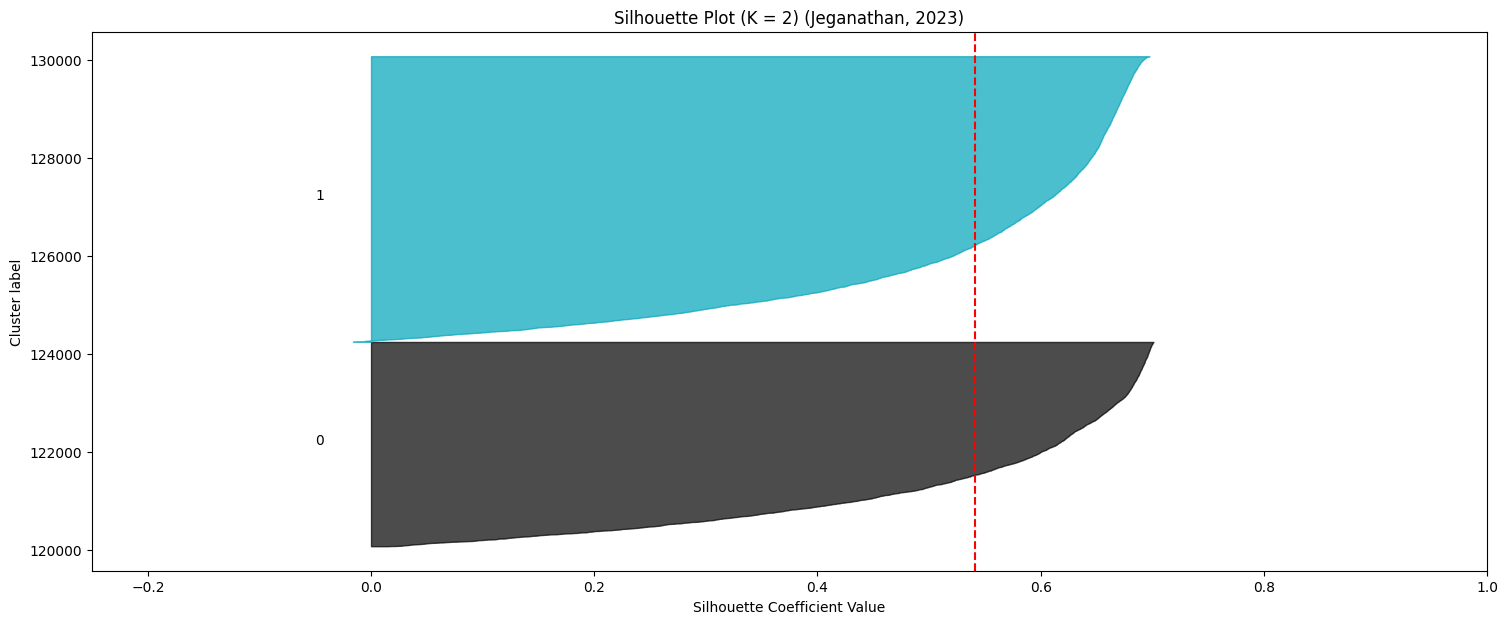

In [227]:
# Code block adapted from Jeganathan (2023)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.25, 1])

for i in range(2):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_values[km_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 2  

ax1.set_title("Silhouette Plot (K = 2) (Jeganathan, 2023)")
ax1.set_xlabel("Silhouette Coefficient Value")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_score(X_train, km_labels), color="red", linestyle="--")

## Principal Component Analysis

Paraphrased from ISLP:

- Generally, if our data is n × p, it will have min(n − 1, p) distinct principal components, but we would ideally like to use the least amount that is feasible.
- We can use a scree plot, and visual judgement/interpretation to determine an appropriate amoutn of PCs 

We will use a scree plot to investigate an appropriate number of components.

Further, we cannot include the categorical variable one-hot encoded columns, as these are not appropriate to standardize in preparation for PCA. There is no way to meaningfully represent these as ordinal data with a psuedo-linear relationship with the response 

In [228]:
n_pca_comps = 7 # we will start with p=7
pca = PCA(n_components=n_pca_comps)
pca_fit = pca.fit_transform(X)

In [229]:
pca_cols = ['PC' + str(i) for i in range(1, 8)]
X_pca = pd.DataFrame(pca_fit, index=X.index, columns=pca_cols)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
55460,0.844235,-0.004210,-0.210744,0.064542,-0.312562,0.017996,0.019490
191859,2.680209,0.063781,0.091358,0.175674,-0.267263,0.010263,-0.083377
46956,2.606787,0.429193,-0.379525,-0.188636,-0.275947,0.135266,0.070569
18672,0.569373,-0.033159,-0.136163,-0.186506,0.404112,0.016455,-0.195686
151975,-2.394896,-0.013919,-0.262762,0.104448,-0.114358,-0.043815,0.016854


### Figure 6: PCA Scree Plot

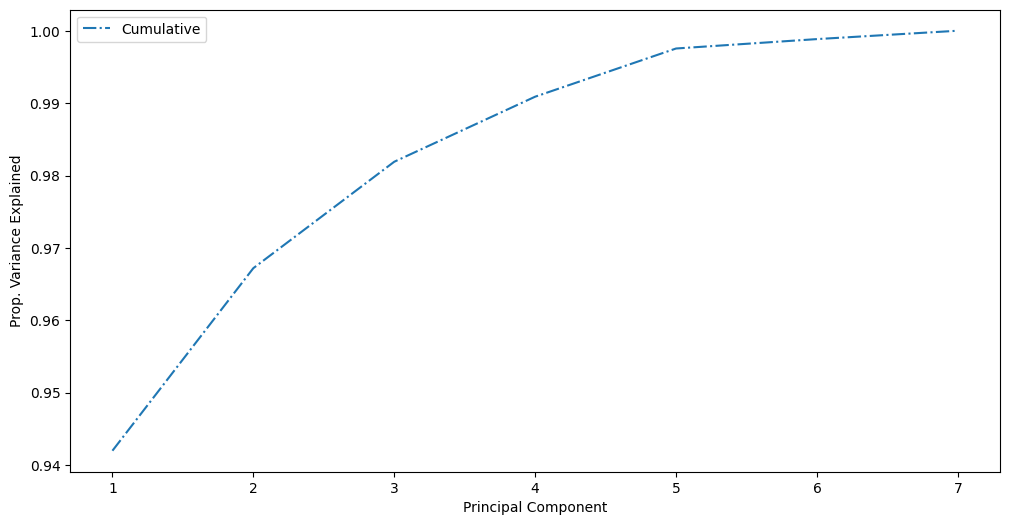

In [230]:
# Generating a cumulative scree plot
fig , ax1 = plt.subplots(figsize=(12,6))
prop_var_exp = pca.explained_variance_ratio_
plt.plot([i for i in range(1, 8)], np.cumsum(prop_var_exp), '-.', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.legend()
plt.show()

We can see that the explained variance becomes aymptotic at n=5. As such, we will include only 5 components for the PCA.

In [231]:
n_pca_comps = 5
pca = PCA(n_components=n_pca_comps)
pca_fit = pca.fit_transform(X)
pca_cols = ['PC' + str(i) for i in range(1, 6)]
X_pca = pd.DataFrame(pca_fit, index=X.index, columns=pca_cols)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5
55460,0.844235,-0.004210,-0.210744,0.064542,-0.312562
191859,2.680209,0.063781,0.091358,0.175674,-0.267263
46956,2.606787,0.429193,-0.379525,-0.188636,-0.275947
18672,0.569373,-0.033159,-0.136163,-0.186506,0.404112
151975,-2.394896,-0.013919,-0.262762,0.104448,-0.114358


In [232]:
# Will will perform K-Means clustering, repeating what we have previously done...
# ...but now with the PCA component set

# We will re-split our data (same random state), but now with the pca components as the X
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=13)

In [233]:
# evaluation same as previous

for n_km_clusters in range(2,10):
    pca_km_cluster = KMeans(n_clusters=n_km_clusters, random_state=13, n_init=10).fit(X_train)
    pca_km_cluster.fit(X_train)
    pca_km_labels = pca_km_cluster.fit_predict(X_train) # training set labels
    pca_test_km_labels = pca_km_cluster.fit_predict(X_test) # test set labels
    
    # creating copies of the test/train sets and adding the predicted labels from clustering
    X_train_cluster = X_train.copy()
    X_train_cluster['label'] = pca_km_labels
    X_test_cluster = X_test.copy()
    X_test_cluster['label'] = pca_test_km_labels

    # using a decision tree regressor for predictions here (as the response is continuous)
    dtree_reg.fit(X_train_cluster, y_train) # fitting regression with training data
    dtree_labels = dtree_reg.predict(X_test_cluster) # predicting with test data
    mse = mean_squared_error(y_test, dtree_labels)
    print('# clusters: ', n_km_clusters, ' MSE: ', mse.round(2), 
          ' Sil. Score: ', silhouette_score(X_train, pca_km_labels).round(2))
    
    

# clusters:  2  MSE:  0.9  Sil. Score:  0.54
# clusters:  3  MSE:  0.9  Sil. Score:  0.47
# clusters:  4  MSE:  0.89  Sil. Score:  0.44
# clusters:  5  MSE:  0.9  Sil. Score:  0.41
# clusters:  6  MSE:  0.9  Sil. Score:  0.4
# clusters:  7  MSE:  0.91  Sil. Score:  0.37
# clusters:  8  MSE:  0.89  Sil. Score:  0.35
# clusters:  9  MSE:  0.9  Sil. Score:  0.32


The optimal number of clusters remains as 2, per the silhouette score. The PCA transformation has caused MSE to remain nearly constant throughout each trail/# of clusters used. 

In [234]:
# the optimal # of clusters remains as 2
pca_km_cluster = KMeans(n_clusters=2, random_state=13, n_init=10).fit(X_train)
pca_km_labels = pca_km_cluster.fit_predict(X_train)
pca_km_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

### Figure 7: PCA-transformed K-Means Clusters

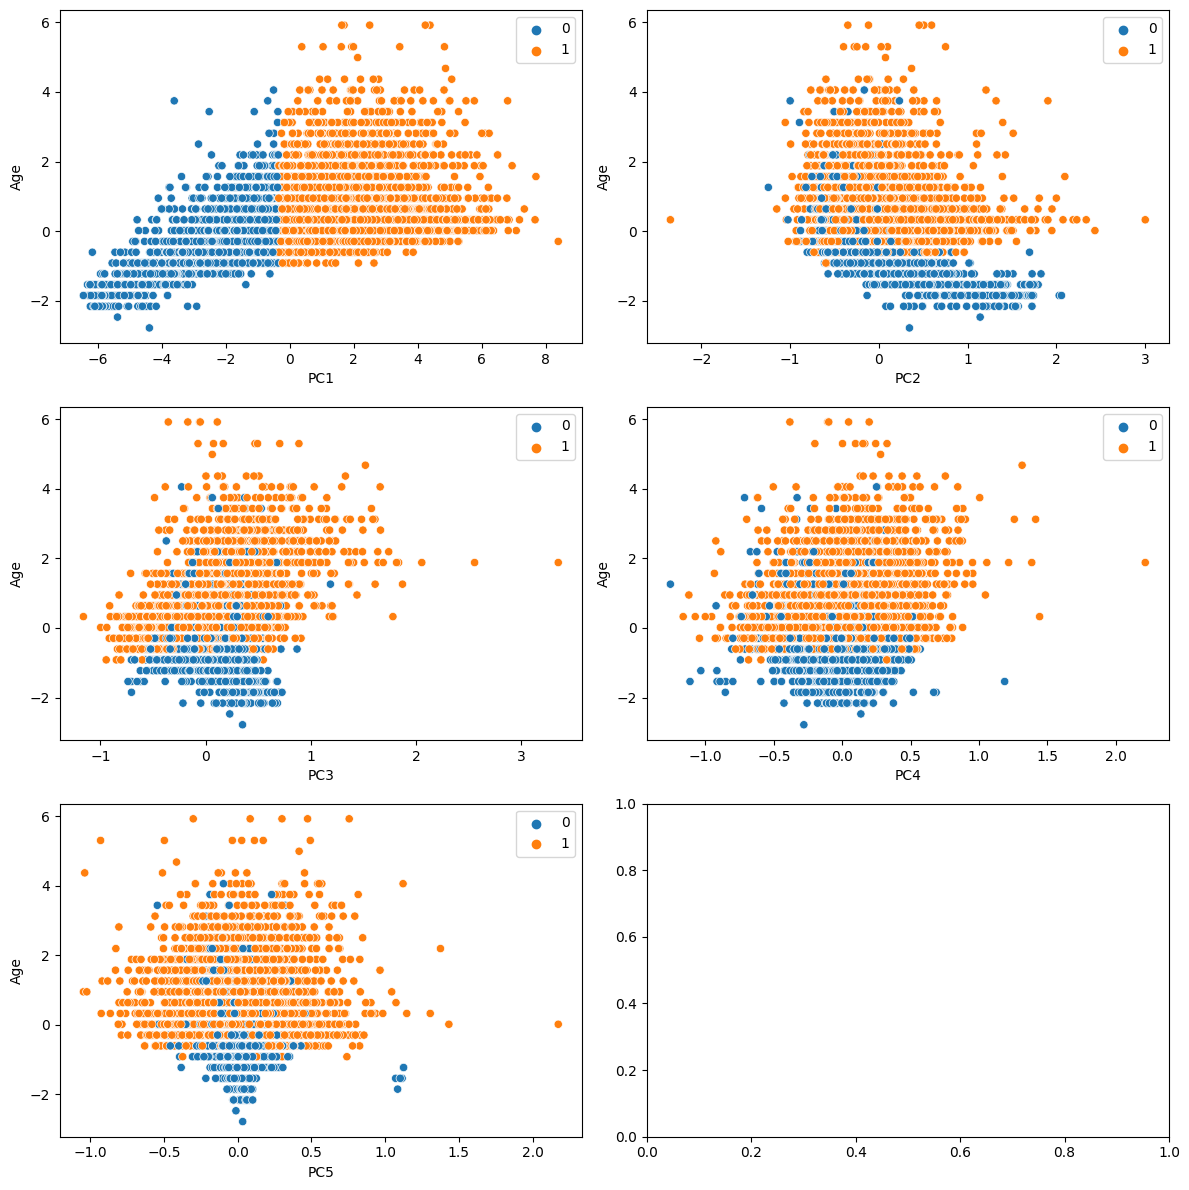

In [235]:
# itterate through columns to produce a figure showing each variables clusters in relation to the response (Age)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=y_train["Age"], 
                    hue=pca_km_labels, ax=axs[i])
plt.tight_layout()

In [236]:
# Lastly, computing the rand index to assess similarity between clusters
print(rand_score(km_labels, pca_km_labels))
print(rand_score(km_labels, agg_labels.labels_))
print(rand_score(agg_labels.labels_, pca_km_labels))

0.9998
0.8475959795979598
0.8474292229222923
